

# Project: Investigate a Movie Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

>  This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings,  budget, genre, director and revenue. 
Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters. 
There are some odd characters in the ‘cast’ column.
The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.

### Question(s) for Analysis

> **1. How is the popularity of movies over the years ?**

> **2. How is the rate of vote for movies over the years?**

> **3. How is runtime of movies over the years ?**

> **4. What is the relationship between popularity and vote count?**

> **5. What is the relationship between popularity and runtime?**

> **6. What is the relationship between vote count and runtime?**

> **7. How is the distribution of runtime for some popular movies?**


### Loading the dataset

 We will import necessary packages that we will use in investigating the movie dataset 

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.


# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline


 We will now upgrade pandas for some function to work

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

> We will load in the data, check for cleanliness, and then trim and clean our dataset for analysis. **We will document every steps in mark-down cells  and comments in the cells to justify our cleaning decisions.**




In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#  types and look for instances of missing or possibly errant data.
movies_sd = pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv')

 In the above process we load the data to be used in investigating.

 After loading the dataset we get the overview of how the data is presented.

In [4]:
#checks features of the data
movies_sd.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


#### We continue to explore the data

 we will first gain info. of the data, where we get to see the total no. of columns, the no. of entries in different columns and the datatype of different data columns. 

In [5]:
#shows details in the data
movies_sd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

 We continue to  determine how many duplicated values are present in the dataset. 
 Where the code that is being run gives total no. of duplicated data present in the dataset

In [6]:
#shows total no. of duplicated values
movies_sd.duplicated().sum()

1

In [7]:
#shows unique values in the data
movies_sd.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

The code above shows unique values of each column in the columns. 


### Data Cleaning


**During data wrangling we've noticed there are some missing values in some columns(Null values). 
 There are so many irrelevant columns, that needs to be standardized to relevant columns. 
 Some of the datas are not properly grouped according to the datatypes.
 There is a Duplicated row.**


 

**We will drop columns that are irrelevant to our analysis**

In [8]:
#we drop the unused columns
movies_sd = movies_sd.drop(['id','imdb_id', 'cast', 'homepage', 'tagline', 'keywords', 'overview', 'production_companies'], axis = 1)

 The columns(`id`,`imdb_id`, `cast`, `homepage`, `tagline`, `keywords`, `overview`, `production_companies`) mentioned above in the code are dropped from the table. We will see how  the dataset is, after the changes.

In [9]:
#displays changes
movies_sd.head(3)

,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


As we can see the changes are visible from the display above.

>**We will drop all duplicated values**

In [10]:
#drops all duplicates in the data
movies_sd.drop_duplicates(inplace=True)

The code drops all the duplicates in the data if they are present due to the condition `inplace=True`

In [11]:
#checks for duplicate values, it should return 0.
sum(movies_sd.duplicated())

0

After we dropped all the duplicates in the dataset, we check if there are any left.

**Note** 
 It should return a 0 value. This is because there aren't any duplicated values.

>**We will change the datatype for some columns**

In [12]:
#converting the budget,revenue, budget_adj and revenue_adj to strings
movies_sd['budget'] = movies_sd['budget'].astype(str)
movies_sd['revenue'] = movies_sd['revenue'].astype(str)
movies_sd['budget_adj'] = movies_sd['budget_adj'].astype(str)
movies_sd['revenue_adj'] = movies_sd['revenue_adj'].astype(str)

#converting the release_date to datetime format
movies_sd['release_date'] = pd.to_datetime(movies_sd['release_date'])

We have change the datatype of the columns `budget`,`revenue`, `budget_adj` and `revenue_adj` to `strings` and converted the `release_date` to `datetime format`

In [13]:
#confirm changes to the datatype, it should reflect as object to show it's string
movies_sd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 13 columns):
popularity        10865 non-null float64
budget            10865 non-null object
revenue           10865 non-null object
original_title    10865 non-null object
director          10821 non-null object
runtime           10865 non-null int64
genres            10842 non-null object
release_date      10865 non-null datetime64[ns]
vote_count        10865 non-null int64
vote_average      10865 non-null float64
release_year      10865 non-null int64
budget_adj        10865 non-null object
revenue_adj       10865 non-null object
dtypes: datetime64[ns](1), float64(2), int64(3), object(7)
memory usage: 1.2+ MB


As we can see the changes for the datatypes to some columns are evident in the display.

As you can notice we have minimize the missing values in the columns, by eliminating irrelevant columns. 
This was achieved in the dropping columns sector

<a id='eda'></a>
## Exploratory Data Analysis



### 1. How is the popularity of movies over the years ?



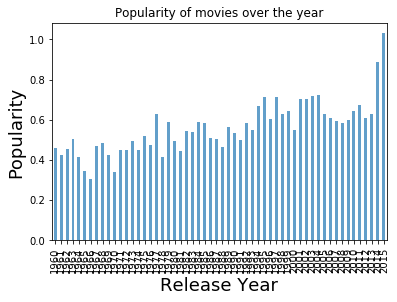

In [14]:
#we compare the popularity over the years

movies_sd.groupby('release_year')['popularity'].mean().plot(kind='bar', title='Popularity of movies over the year', alpha=.7);
plt.xlabel('Release Year', fontsize=18)
plt.ylabel('Popularity', fontsize=18);


As we can see in the graph above as the years goes by the popularity of the movies continue to rise. 

### 2. How is the rate of vote for movies over the years?


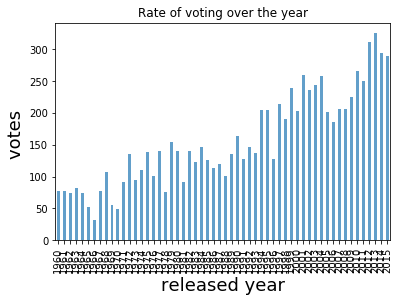

In [15]:
#we compare vote counts each years
movies_sd.groupby('release_year')['vote_count'].mean().plot(kind='bar', title='Rate of voting over the year', alpha=.7);
plt.xlabel('released year', fontsize=18)
plt.ylabel('votes ', fontsize=18);

As we can see in the graph above as the years goes by the no. of people voting for movies increases. 

### 3. How is runtime of movies over the years ?

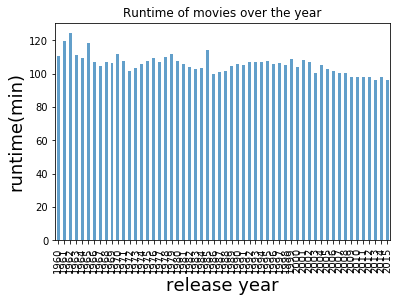

In [16]:
#we compare runtime of movies over the years
movies_sd.groupby('release_year')['runtime'].mean().plot(kind='bar', title='Runtime of movies over the year', alpha=.7);
plt.xlabel('release year', fontsize=18)
plt.ylabel('runtime(min)', fontsize=18);

As we can see in the graph above as the years goes by the running time of the movies decreases. 

###  4. What is the relationship between popularity and vote count?

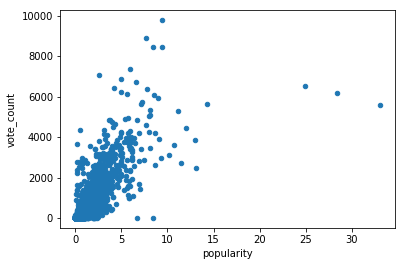

In [17]:
#scatter plot for the relationship between popularity and vote count.
movies_sd.plot(x='popularity', y='vote_count' , kind = 'scatter');


The graph above shows a positive correlation between `vote count` and `popularity`

### 5. What is the relationship between popularity and runtime?

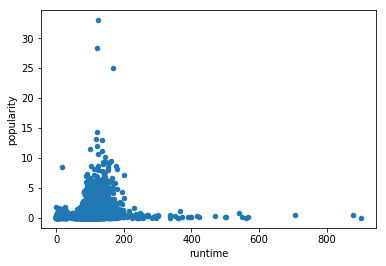

In [18]:
#scatter plot for the relationship between popularity and runtime.
movies_sd.plot(x='runtime', y='popularity' , kind = 'scatter');

The graph above is more densely populated between `0-200 in runtime` and `0-10 in popularity rating`

### 6. What is the relationship between vote count and runtime?

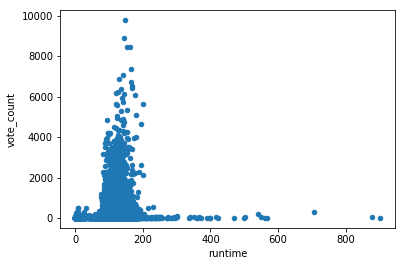

In [19]:
#scatter plot for vote count and runtime relationship.
movies_sd.plot(x='runtime', y='vote_count' , kind = 'scatter');

The graph above is more densely populated between `0-200 in runtime` and `0-4000 in votes count`

### 7. How is the distribution of runtime for some popular movies?

In the cell below we will introduce a function for plotting a histogram. Where we will define the parameters for the plot.

In [20]:
# defines function that plots a histogram
def histogram_plotter(df, x, xlabel, ylabel, title):
  """
  This function plots a histogram based on parameters passed in:
  df (DataFrame): is the Dataframe of interest
  x (String): is the Series to be plotted
  xlabel (String): is the Label on the x-axis
  ylabel (String): is the Label on the y-axis
  title (String): is the Title of the plot
  """
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title(title)
  plot = df[x].hist()
  return plot

The function is now set we will call it to plot for the relationship between runtime of movies with the total no. of movie under the set duration.

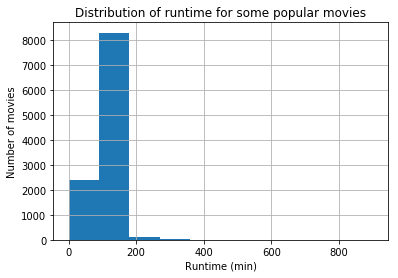

In [21]:
histogram_plotter(movies_sd, "runtime", "Runtime (min)", "Number of movies", "Distribution of runtime for some popular movies");

The graph is more skewed to the right. We can see 2 different halves of the runtime of movies that lies in the range `<200 min`; 
1. The 1st half is less than half the `<200` contains total no. of movies in between `3000-2000`. 
2. The 2nd half is greater than half the `<200` contains total no. of movies more than `8000`.  

<a id='conclusions'></a>
## Conclusions
 ### Results;

> **From the first question about the popularity of movies over the years, which shows relationship between released year for movies with popularity, we can see that the histogram is more skewed to the left. This means that movies are becoming more popular over the years.**

> **From the second question about the rate of voting for movies over the years, which shows relationship between released year for movies with votes casted, we can see that the histogram is more skewed to the left. This means that movie voting is being done more in recent years.**

> **From the third question about the runtime of movies over the years, which shows relationship between released year for movies with there runtime in minutes, we can see that the histogram is more skewed to the right. This means that movies have reduced there runtime over the years.**

> **From the fourth question which shows relationship between popularity ratings and votes count for movies, we can see the graph which shows a positive correlation between `vote count` and `popularity`. This means that the votes count and popularity ratings of movies are dependent on each other, if the votes count is low so does the popularity and vice versa.**

> **From the fifth question which shows relationship between popularity ratings and runtime in minutes of movies , we can see that the graph above is more densely populated between `0-200 in runtime` and `0-10 in popularity rating`. This means that many movies lies in the runtime of `<200 min` and do have a popularity ratings of `<10`.**

> **From the sixth question which shows relationship between vote counts and runtime in minutes of movies , we can see that the graph above is more densely populated between `0-200 in runtime` and `0-4000 in votes count`. This means that many movies lies in the runtime of `<200 min` and do have votes count of `<4000`.**

> **From the seventh question which shows how is the distribution of runtime for some popular movies , we can see that the graph is more skewed to the right. We can see 2 different halves of the runtime of movies that lies in the range `<200 min`; The 1st half is less than half the `<200 min` contains total no. of movies in between `3000-2000`. The 2nd half is greater than half the `<200 min` contains total no. of movies more than `8000`. 
This shows that many movies lies in this 2nd half in the range `<200 min`.** 


### Limitations

> **1. The dataset had so many irrelevant data that needed to be cleaned.**

> **2. Some features had some missing values that there was need to eliminate them.**

> **3. The dataset contained different datatypes that there was need to change the datatypes to the appropriate one.**


In [22]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0